## Unsupervised Learning Part-5

### All possible dimensionality reduction techniques that can be implemented using python

 - Missing Value Ratio
 - Low Variance filter
 - High Correlation filter
 - Random Forest
 - Factor analysis
 - Principal Component Analysis
 - Independent Component Analysis
 - ISOMAP
 - t-SNE
 - UMAP

In [1]:
#Imports
from PIL import Image
from PIL import ImageChops
import numpy

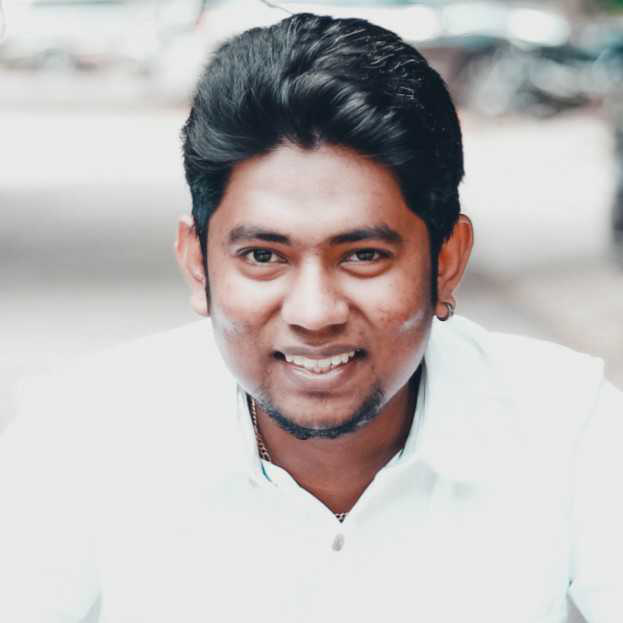

In [2]:
# Original Image 
img = Image.open('Selvam.jpg')
img

In [3]:
# Function to load image and turn it into a numpy array to extract RGB values
def load_image(image):
    image = Image.open(image)
    im_array = numpy.array(image)

    red = im_array[:, :, 0]
    green = im_array[:, :, 1]
    blue = im_array[:, :, 2]

    return red, green, blue

In [4]:
def channel_compress(color_channel, singular_value_limit):
    u, s, v = numpy.linalg.svd(color_channel)
    compressed = numpy.zeros((color_channel.shape[0], color_channel.shape[1]))
    n = singular_value_limit

    left_matrix = numpy.matmul(u[:, 0:n], numpy.diag(s)[0:n, 0:n])
    inner_compressed = numpy.matmul(left_matrix, v[0:n, :])
    compressed = inner_compressed.astype('uint8')
    return compressed

red, green, blue = load_image("Selvam.jpg")
singular_val_lim = 350

In [5]:
def compress_image(red, green, blue, singular_val_lim):
    compressed_red = channel_compress(red, singular_val_lim)
    compressed_green = channel_compress(green, singular_val_lim)
    compressed_blue = channel_compress(blue, singular_val_lim)

    im_red = Image.fromarray(compressed_red)
    im_blue = Image.fromarray(compressed_blue)
    im_green = Image.fromarray(compressed_green)

    new_image = Image.merge("RGB", (im_red, im_green, im_blue))
    new_image.save("Selvam-edited.jpg")
    return new_image

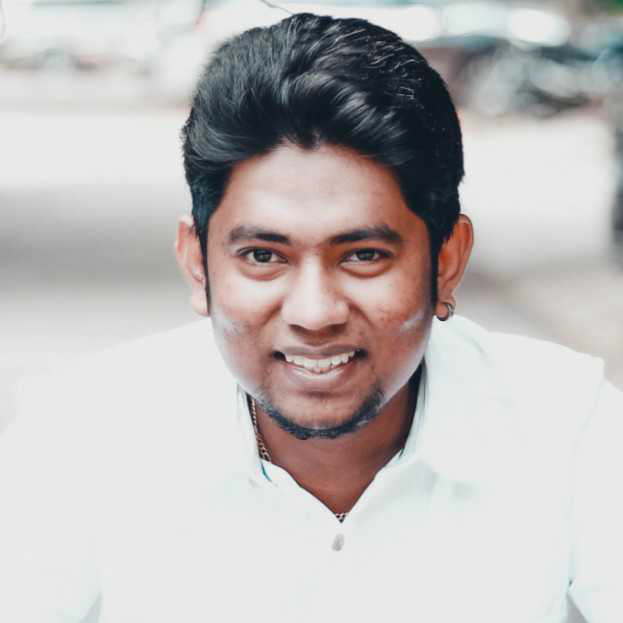

In [6]:
new_image = compress_image(red, green, blue, singular_val_lim)
# Edited Image
new_image